# bootstrap_DM.ipynb

Example of uncertainty analysis on mass estimate of dark-matter free galaxy NGC 1052-DF2, using bootstrapping.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
# sklearn used to have cross_validation.Bootstrap but not anymore
import pandas as pd

In [2]:
df = pd.read_table("DF2_data_vD+18c.txt",skiprows=[1])
df

,ID,cz,+/-
0,39,1818,7.0
1,59,1799,15.5
2,71,1805,7.0
3,73,1814,3.0
4,77,1804,6.0
5,85,1801,5.5
6,91,1802,10.0
7,92,1789,6.5
8,98,1784,10.0
9,101,1800,13.5


In [3]:
vel, dvel = df['cz'], df['+/-'] # velocities and uncertainties
sigma = np.std(vel,ddof=1)
print('velocity dispersion = %.2f km/s' % sigma)
# note this calculation does not take the errors into account

velocity dispersion = 10.10 km/s


In [4]:
np.random.seed(0)
df_boot = resample(df)
df_boot

,ID,cz,+/-
5,85,1801,5.5
0,39,1818,7.0
3,73,1814,3.0
3,73,1814,3.0
7,92,1789,6.5
9,101,1800,13.5
3,73,1814,3.0
5,85,1801,5.5
2,71,1805,7.0
4,77,1804,6.0


In [5]:
vel_boot, dvel_boot = df_boot['cz'], df_boot['+/-'] # velocities and uncertainties
print('bootstrapped velocity dispersion = %.2f km/s' % np.std(vel_boot,ddof=1))
# note this calculation does not take the errors into account

bootstrapped velocity dispersion = 8.92 km/s


In [6]:
plt.rcParams.update({'font.size': 21})

Text(0, 0.5, '$N(v)$')

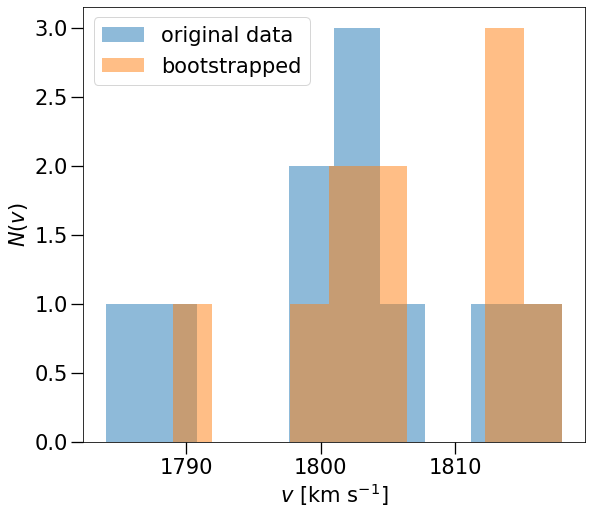

In [7]:
fig1 = plt.figure(figsize=(9,8))
plt.hist(vel,label='original data',alpha=0.5)
plt.hist(vel_boot,label='bootstrapped',alpha=0.5)
plt.legend(loc='best')
plt.tick_params('both', length=12, width=1.3, which='major')
plt.xlabel('$v$ [km s$^{-1}$]')
plt.ylabel('$N(v)$')

Now do multiple bootstrapping realizations, $N_\mathrm{MC} \sim N (\ln N)^2$

In [8]:
N_data = len(df['cz']) # 10
N_MC = int( N_data * np.log(N_data)**2 ) # 53
sigma_boot = np.zeros(N_MC)
for i in range(N_MC) :
    df_boot = resample(df)
    vel_boot, dvel_boot = df_boot['cz'], df_boot['+/-']
    sigma_boot[i] = np.std(vel_boot,ddof=1)
#    print('bootstrapped velocity dispersion = %.2f km/s' % sigma_boot[i])

Text(0, 0.5, '$P(\\sigma)$')

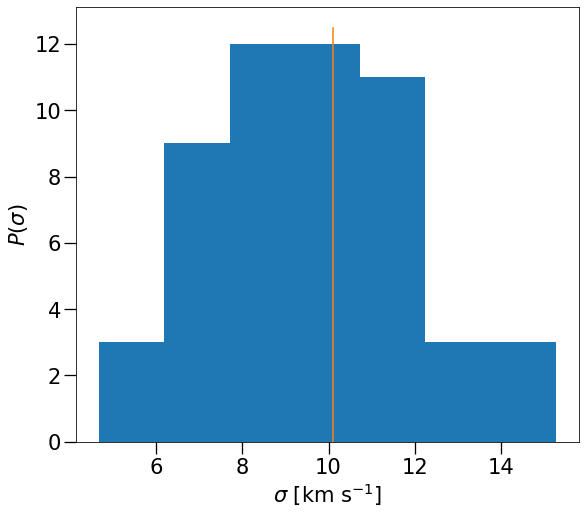

In [9]:
fig2 = plt.figure(figsize=(9,8))
plt.hist(sigma_boot,bins='auto')
plt.plot([sigma,sigma],[0,12.5]) # original measurement
plt.tick_params('both', length=12, width=1.3, which='major')
plt.xlabel('$\sigma$ [km s$^{-1}$]')
plt.ylabel('$P(\sigma)$')